In [1]:
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as sns

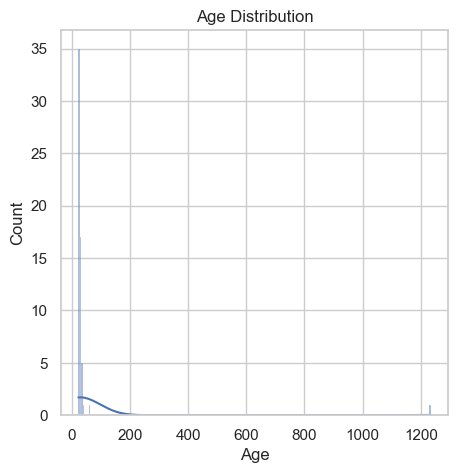

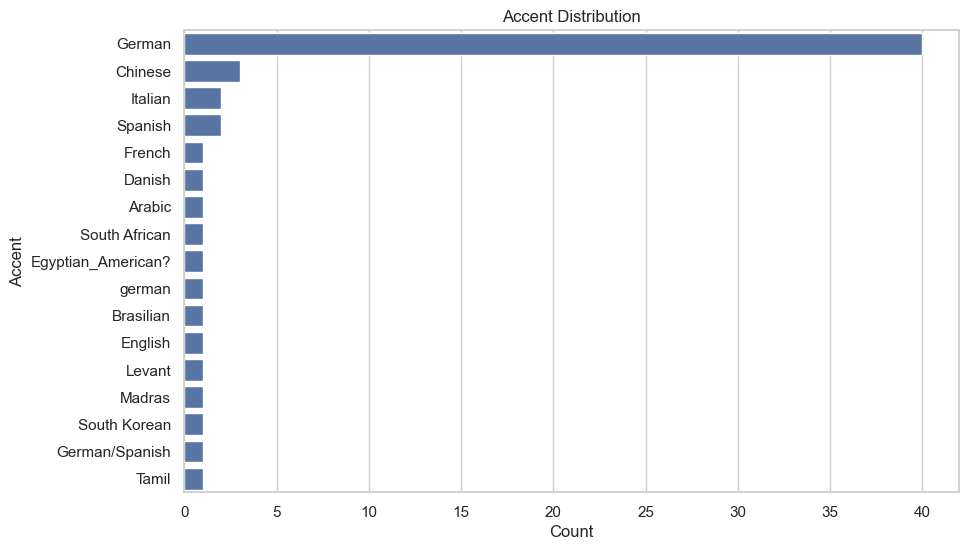

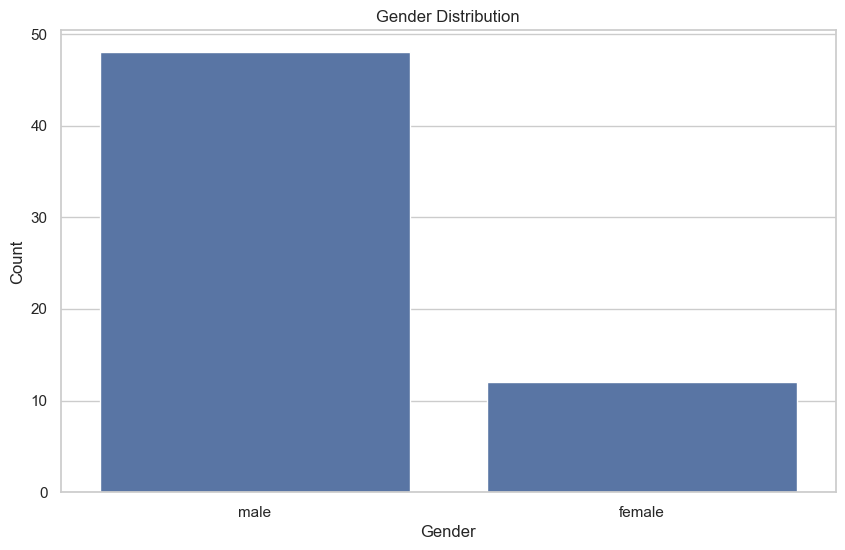

In [2]:
# META OVERVIEW

# Path to your JSON file
file_path = './data/audioMNIST_meta.txt'

with open(file_path, 'r') as file:
    json_data = json.load(file)

df = pd.DataFrame.from_dict(json_data, orient='index')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

sns.set(style="whitegrid")
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="age", binwidth=5, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# Accent Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y="accent", data=df, order = df['accent'].value_counts().index)
plt.title('Accent Distribution')
plt.xlabel('Count')
plt.ylabel('Accent')
plt.show()
# Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="gender", data=df, order = df['gender'].value_counts().index)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

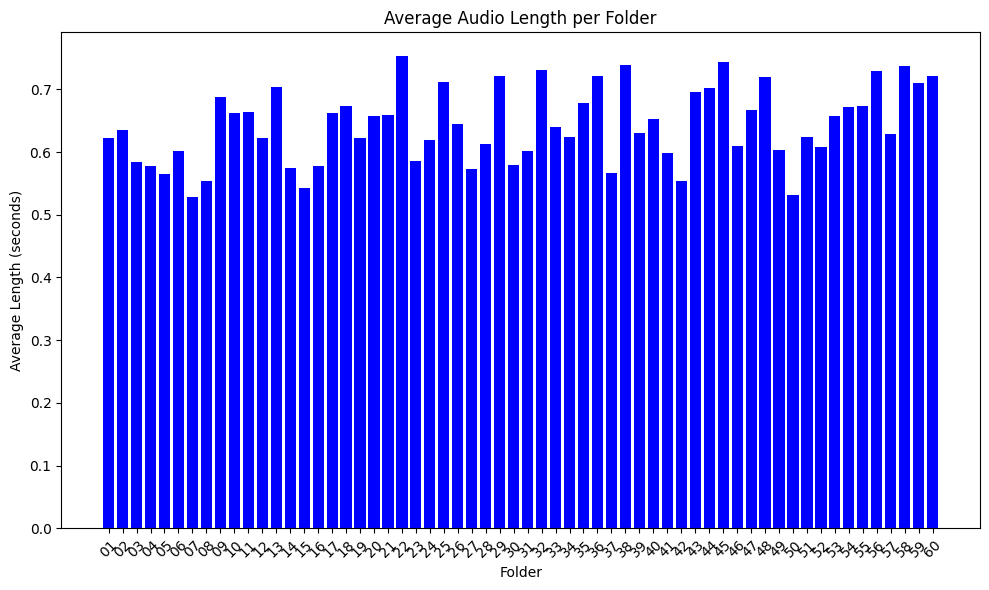

In [ ]:
# AVERAGE LENGTH OF AUDIO PER FOLDER

data_dir = 'data'
folder_lengths = {} 

for folder in sorted(os.listdir(data_dir)):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        lengths = [] 
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'): 
                file_path = os.path.join(folder_path, filename)
                audio, sr = librosa.load(file_path, sr=None)
                lengths.append(len(audio) / sr)

     
        if lengths:
            folder_lengths[folder] = sum(lengths) / len(lengths)



folders = list(folder_lengths.keys())
avg_lengths = list(folder_lengths.values())

plt.figure(figsize=(10, 6))
plt.bar(folders, avg_lengths, color='blue')
plt.xlabel('Folder')
plt.ylabel('Average Length (seconds)')
plt.title('Average Audio Length per Folder')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()